In [33]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import folium

In [2]:
import tensorflow as tf

In [37]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [7]:
df = pd.read_csv('C:\\Users\\noteland\\Documents\\forest\\sanbul4.csv',encoding='cp949')
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['발생일시_년', '발생일시_월', '발생일시_일', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생장소_읍면', '발생장소_동리', '발생장소_지번', '발생원인_구분', '발생원인_세부원인', '발생원인_기타',
       '피해면적_합계', 'X-좌표', 'Y-좌표', '정제결과', '종관기상관측소', '기온', '습도', '풍향', '풍속'],
      dtype='object')

In [8]:
df.corr()

발생일시_년    발생일시_월    발생일시_일  진화종료시간_년  진화종료시간_월  진화종료시간_일  \
발생일시_년    1.000000 -0.023062 -0.011257  0.999989 -0.023481 -0.009736   
발생일시_월   -0.023062  1.000000  0.010083 -0.022839  0.997590  0.012294   
발생일시_일   -0.011257  0.010083  1.000000 -0.011098  0.009369  0.986844   
진화종료시간_년  0.999989 -0.022839 -0.011098  1.000000 -0.023480 -0.009760   
진화종료시간_월 -0.023481  0.997590  0.009369 -0.023480  1.000000  0.012974   
진화종료시간_일 -0.009736  0.012294  0.986844 -0.009760  0.012974  1.000000   
피해면적_합계   0.029902 -0.008577 -0.042295  0.029902 -0.007811 -0.038143   
X-좌표      0.022570  0.059505 -0.037830  0.022390  0.061918 -0.033699   
Y-좌표      0.249679  0.016794 -0.027029  0.249626  0.019369 -0.026948   
종관기상관측소  -0.047610  0.013991 -0.001119 -0.047595  0.013545  0.003986   
기온        0.026182  0.193919  0.000777  0.026116  0.195090  0.004636   
습도        0.029465  0.181026  0.023863  0.029626  0.178303  0.019977   
풍향        0.015781 -0.064109  0.007749  0.015819 -0.065439  0.011218   
풍속       -0.110047 -0.085360 -0.010426 -0.109921 -0.088363 -0.008502   

           피해면적_합계      X-좌표      Y-좌표   종관기상관측소        기온        습도  \
발생일시_년    0.029902  0.022570  0.249679 -0.047610  0.026182  0.029465   
발생일시_월   -0.008577  0.059505  0.016794  0.013991  0.193919  0.181026   
발생일시_일   -0.042295 -0.037830 -0.027029 -0.001119  0.000777  0.023863   
진화종료시간_년  0.029902  0.022390  0.249626 -0.047595  0.026116  0.029626   
진화종료시간_월 -0.007811  0.061918  0.019369  0.013545  0.195090  0.178303   
진화종료시간_일 -0.038143 -0.033699 -0.026948  0.003986  0.004636  0.019977   
피해면적_합계   1.000000  0.070152  0.066502 -0.043489  0.019744 -0.049148   
X-좌표      0.070152  1.000000  0.034186  0.156940 -0.073151 -0.101879   
Y-좌표      0.066502  0.034186  1.000000 -0.411580  0.059567 -0.088487   
종관기상관측소  -0.043489  0.156940 -0.411580  1.000000  0.015476 -0.038449   
기온        0.019744 -0.073151  0.059567  0.015476  1.000000 -0.207716   
습도       -0.049148 -0.101879 -0.088487 -0.038449 -0.207716  1.000000   
풍향        0.011406 -0.016590  0.002862 -0.025434 -0.088296 -0.232383   
풍속        0.079232 -0.009545 -0.086610 -0.060839 -0.060166 -0.146344   

                풍향        풍속  
발생일시_년    0.015781 -0.110047  
발생일시_월   -0.064109 -0.085360  
발생일시_일    0.007749 -0.010426  
진화종료시간_년  0.015819 -0.109921  
진화종료시간_월 -0.065439 -0.088363  
진화종료시간_일  0.011218 -0.008502  
피해면적_합계   0.011406  0.079232  
X-좌표     -0.016590 -0.009545  
Y-좌표      0.002862 -0.086610  
종관기상관측소  -0.025434 -0.060839  
기온       -0.088296 -0.060166  
습도       -0.232383 -0.146344  
풍향        1.000000  0.263164  
풍속        0.263164  1.000000

C:\Users\noteland\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\noteland\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


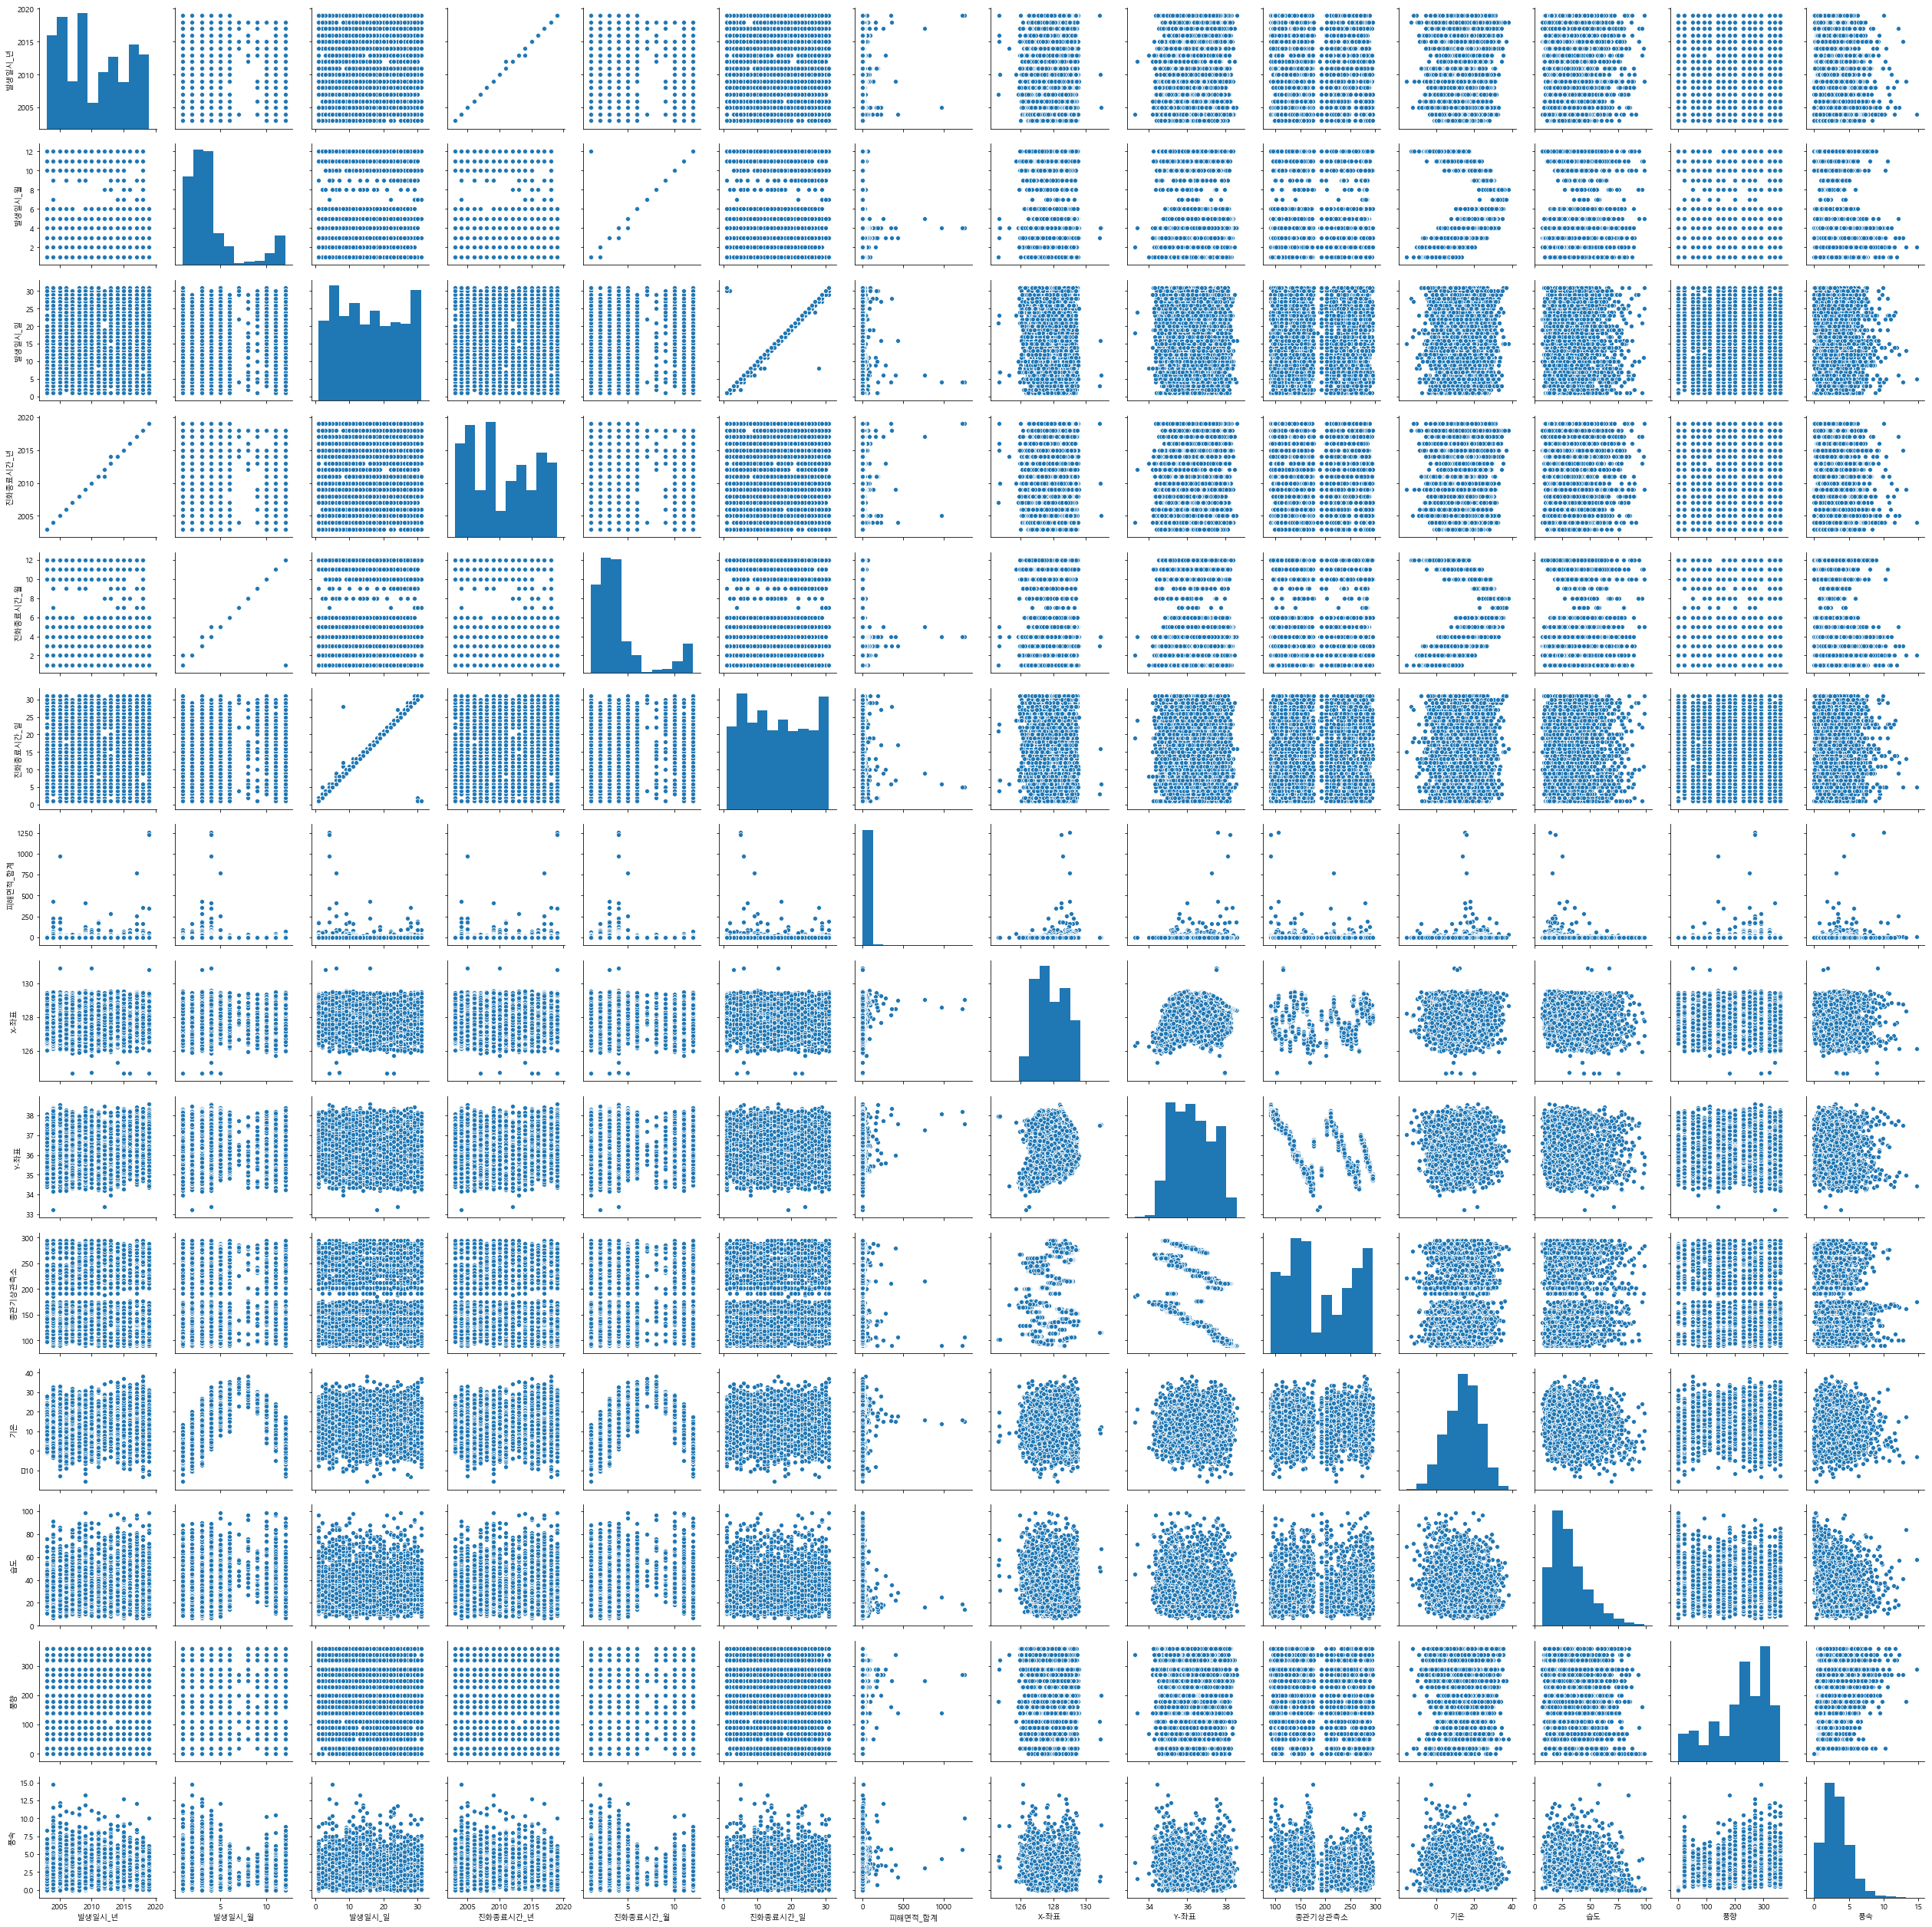

In [11]:
# df2 = df[['기온', '습도','풍향','풍속','계절','피해면적_합계','발생원인_구분']]
# df2.loc[df2['계절'] == '봄', '계절2'] = 1
# df2.loc[df2['계절'] == '여름', '계절2'] = 2
# df2.loc[df2['계절'] == '가을', '계절2'] = 3
# df2.loc[df2['계절'] == '겨울', '계절2'] = 4
# df2.head(20)
# f,ax=plt.subplots(figsize=(18,18))
sns.pairplot(df)

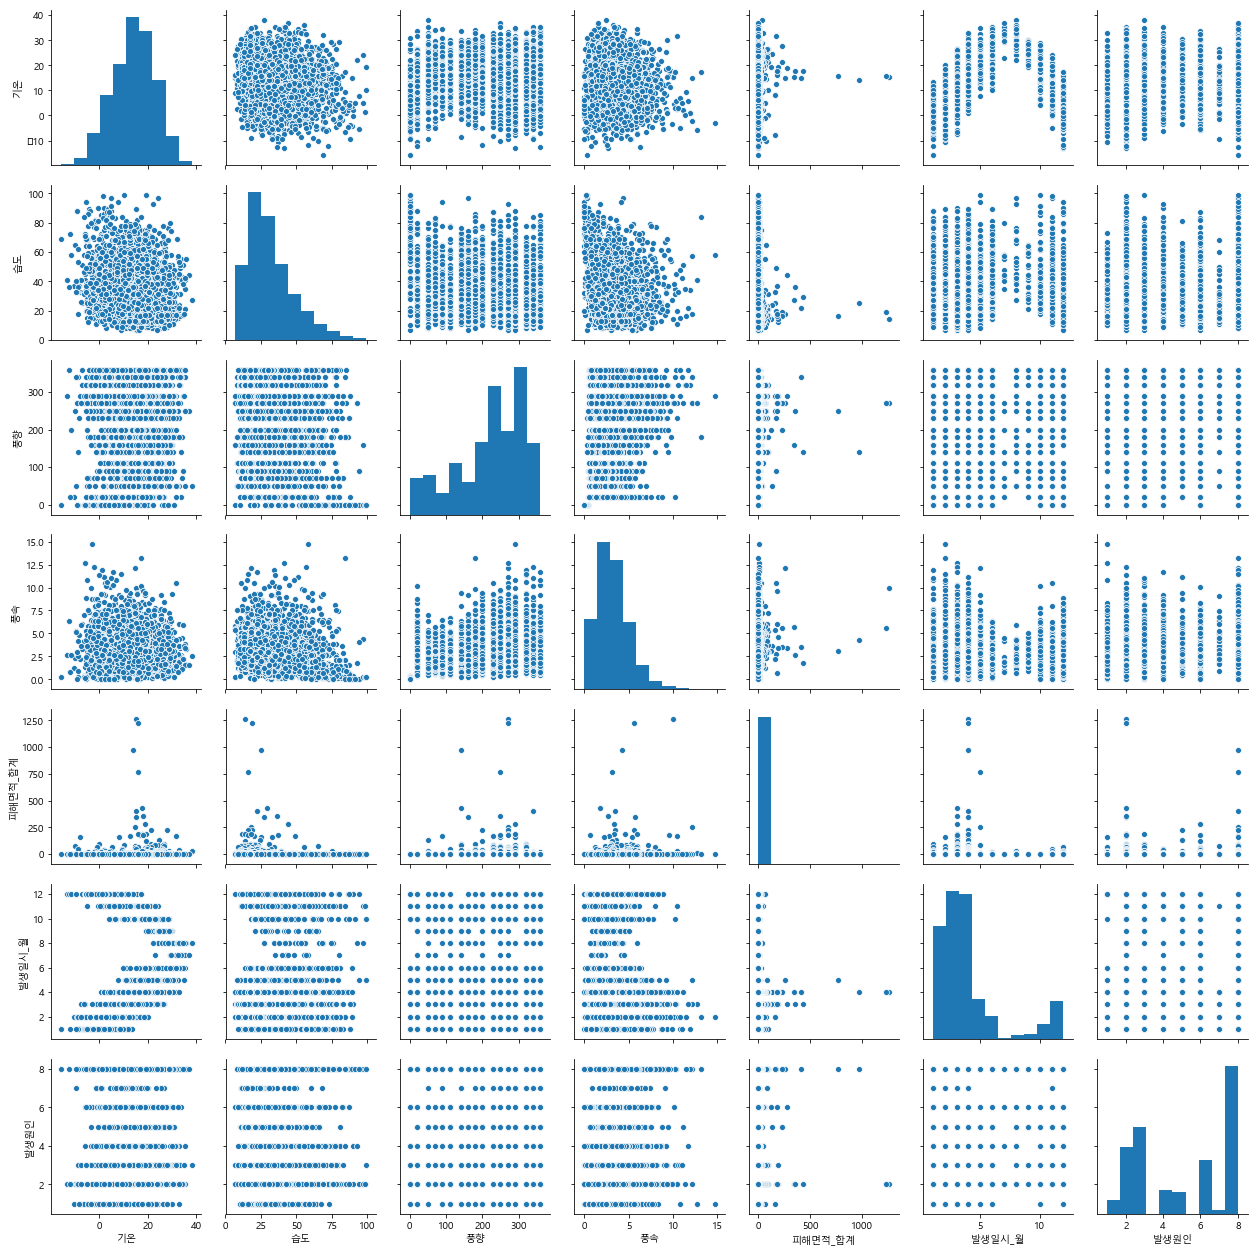

In [24]:
df2 = df[['기온', '습도','풍향','풍속','피해면적_합계','발생원인_구분','발생일시_월','발생일시_요일']]
df2.loc[df2['발생원인_구분'] == '건', '발생원인'] =1
df2.loc[df2['발생원인_구분'] == '기', '발생원인'] =2
df2.loc[df2['발생원인_구분'] == '논', '발생원인'] =3
df2.loc[df2['발생원인_구분'] == '담', '발생원인'] =4
df2.loc[df2['발생원인_구분'] == '성', '발생원인'] =5
df2.loc[df2['발생원인_구분'] == '쓰', '발생원인'] =6
df2.loc[df2['발생원인_구분'] == '어', '발생원인'] =7
df2.loc[df2['발생원인_구분'] == '입', '발생원인'] =8


sns.pairplot(df2)


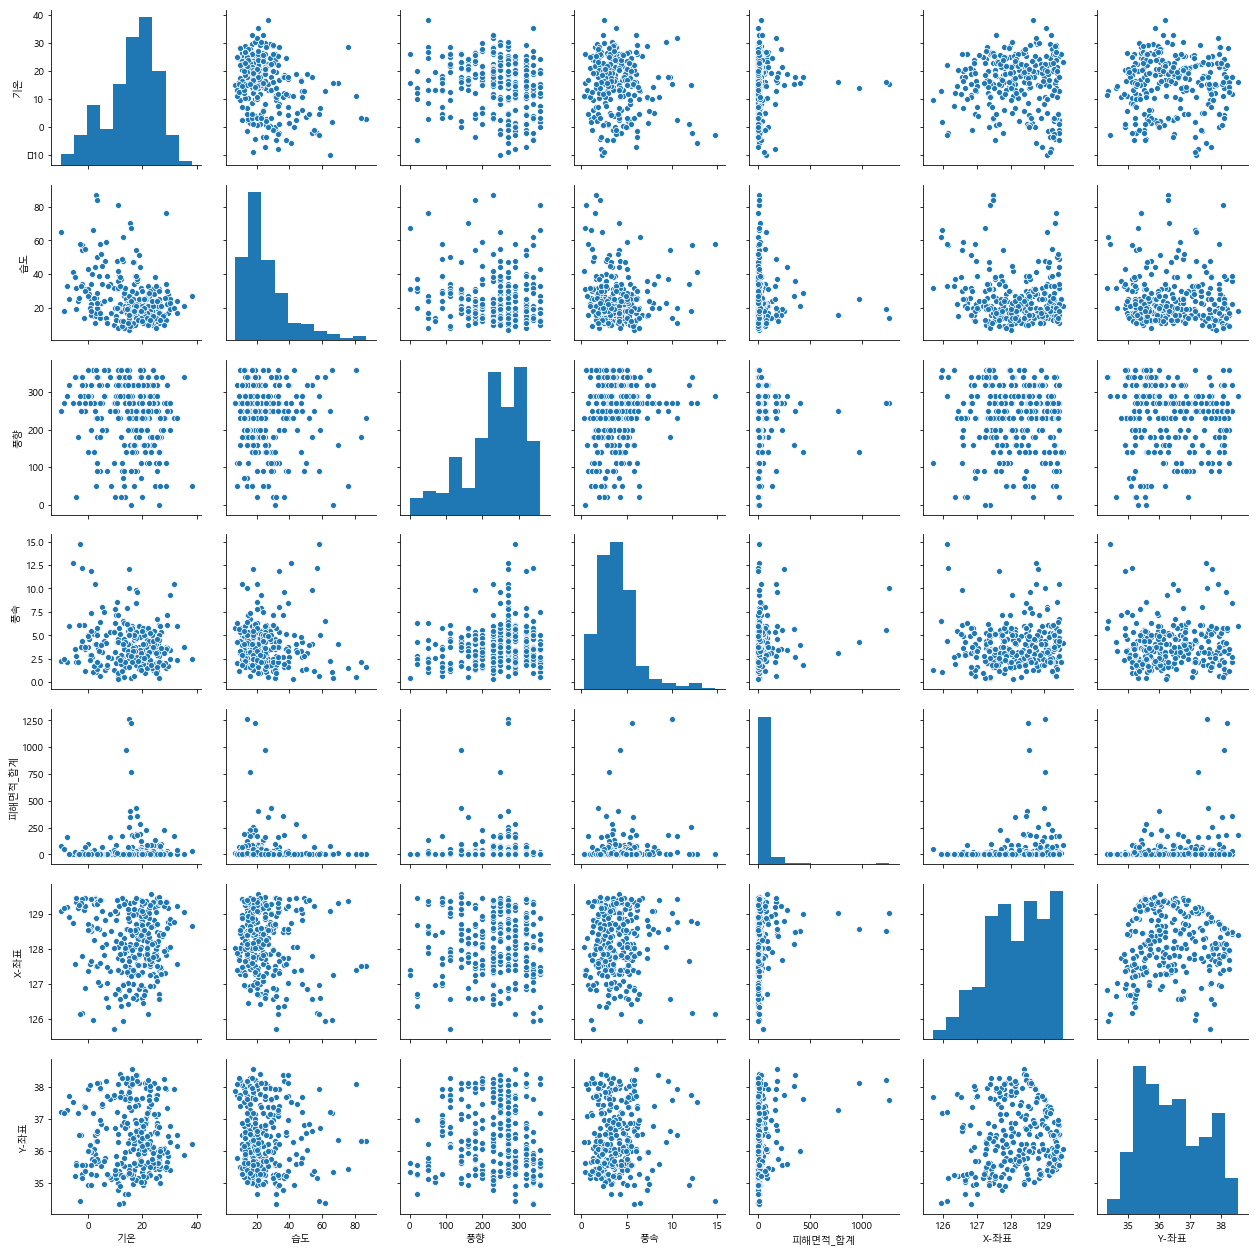

In [39]:
df3 = df[['기온', '습도','풍향','풍속','계절','피해면적_합계','X-좌표','Y-좌표']]
sns.pairplot(df3)


In [76]:
df = pd.read_csv('C:\\Users\\noteland\\Documents\\forest\\3ha이상 산불 날씨추가.csv',encoding='cp949')
df.columns = df.columns.str.replace(' ','')
df.columns

df['X-좌표'] = df['X-좌표'].astype(float)
df['Y-좌표'] = df['Y-좌표'].astype(float)

In [77]:
import folium

In [78]:
map_osm = folium.Map(location=(37.56629, 126.979808), zoom_start=17)
# map_osm
시청_좌표=(37.56629, 126.979808)

In [73]:
df = df.loc[ (df['발생일시_요일'] =='토') | (df['발생일시_요일'] =='일') | (df['발생일시_요일'] =='월')]
df.head(5)

발생일시_년  발생일시_월  발생일시_일 발생일시_시간 발생일시_요일  진화종료시간_년  진화종료시간_월  진화종료시간_일  \
5     2010      12      11   17:00       토      2010        12        11   
14    2008      11       2   19:11       일      2008        11         3   
15    2017      11      18   17:34       토      2017        11        19   
18    2003      11      17   15:20       월      2003        11        18   
22    2013      10      26   15:30       토      2013        10        27   

   진화종료시간_시간 발생장소_관서  ...        X-좌표       Y-좌표                   정제결과  \
5      23:40      울산  ...  129.397874  35.532739      울산광역시 북구 염포동 산115   
14      8:00      동부  ...  129.018835  37.213753  강원도 삼척시 도계읍 흥전리 산92-1   
15     18:00      중부  ...  127.568827  36.169090  충청남도 금산군 제원면 신안리 산8-9   
18     10:55      중부  ...  128.300665  37.069084   충청북도 단양군 매포읍 영천리 산43   
22      9:10      전남  ...  125.936449  34.375889   전라남도 진도군 조도면 외병도리 산1   

   종관기상관측소 방재기상관측소    기온  습도   풍향   풍속  계절  
5      152     943   4.6  23  320  4.1  겨울  
14     216    2674  10.5  48  250  4.3  가을  
15     238     238   0.5  26  270  2.9  가을  
18     221    3116  13.1  27  160  0.6  가을  
22     175     718  12.8  62  340  6.5  가을  

[5 rows x 29 columns]

In [81]:
map_osm = folium.Map(location=시청_좌표, zoom_start=11)

for ix, row in df.iterrows():
    location = (row['Y-좌표'], row['X-좌표'])
#     folium.Marker(location, popup=row['피해면적_합계']).add_to(map_osm)
    folium.CircleMarker(location,radius=row['피해면적_합계']/20,color='#3186cc',fill_color='#3186cc', popup=row['피해면적_합계']).add_to(map_osm)

map_osm

In [ ]:
import pandas as pd
import folium
import webbrowser
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = 'TL_SCCO_SIG_WGS84.json'
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment = 'Total_People_2018.csv'
state_data = pd.read_csv(state_unemployment, encoding = 'euc-kr')
 
# Initialize the map:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)
 
# Add the color for the chloropleth:

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['Code', 'Population'],
 key_on='feature.properties.SIG_CD',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.5,
 legend_name='Population Rate (%)'
)

folium.LayerControl().add_to(m)
 
# Save to html
m.save('folium_kr.html')
webbrowser.open_new("folium_kr.html")

In [63]:
map_osm = folium.Map(location=[37.566345, 126.977893], zoom_start=17) 
folium.Marker([37.566345, 126.977893], popup='서울특별시청', 
icon=folium.Icon(color='red',icon='info-sign')).add_to(map_osm) 
folium.CircleMarker([37.5658859, 126.9754788], 
radius=100,color='#3186cc',fill_color='#3186cc', popup='덕수궁 \
').add_to(map_osm) 
map_osm
# map_osm.save('d:/data/data_al/map6.html')

In [75]:
df['피해면적_합계']>500

5      False
14     False
15     False
18     False
22     False
26     False
30     False
31     False
33      True
34     False
35     False
37     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
48     False
49     False
53     False
58     False
61     False
63     False
65     False
66     False
67     False
73     False
75     False
       ...  
231    False
237    False
238    False
241    False
245    False
246    False
248    False
251    False
253    False
254    False
256    False
257    False
258    False
259    False
260    False
261    False
263    False
264    False
266    False
269    False
271    False
272    False
274    False
276    False
277    False
280    False
283    False
284    False
285    False
287    False
Name: 피해면적_합계, Length: 138, dtype: bool

In [30]:
import folium

map_osm = folium.Map(location=[38.2612401, 128.170973], zoom_start=17) 
folium.Marker([38.2612401, 128.170973], popup='발생확률 73.2%   화재규모     3', 
icon=folium.Icon(color='red',icon='coffee')).add_to(map_osm) 
folium.CircleMarker([38.2612401, 128.170973], 
radius=100,color='#3186cc',fill_color='#3186cc', popup='발생확률= 73.2% , 화재규모= 3').add_to(map_osm) 
map_osm
# map_osm.save('d:/data/data_al/map6.html')

In [34]:
df = pd.read_csv('C:\\Users\\noteland\\Documents\\forest\\andong4.csv',encoding='cp949')
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['기온', '습도', '풍향', '풍속', '산불', '상대습도'], dtype='object')

In [35]:
df.corr()

기온        습도        풍향        풍속  산불      상대습도
기온    1.000000 -0.200653  0.022131 -0.125769 NaN  0.055489
습도   -0.200653  1.000000 -0.467214 -0.467980 NaN  0.511957
풍향    0.022131 -0.467214  1.000000  0.349316 NaN -0.087126
풍속   -0.125769 -0.467980  0.349316  1.000000 NaN -0.257800
산불         NaN       NaN       NaN       NaN NaN       NaN
상대습도  0.055489  0.511957 -0.087126 -0.257800 NaN  1.000000

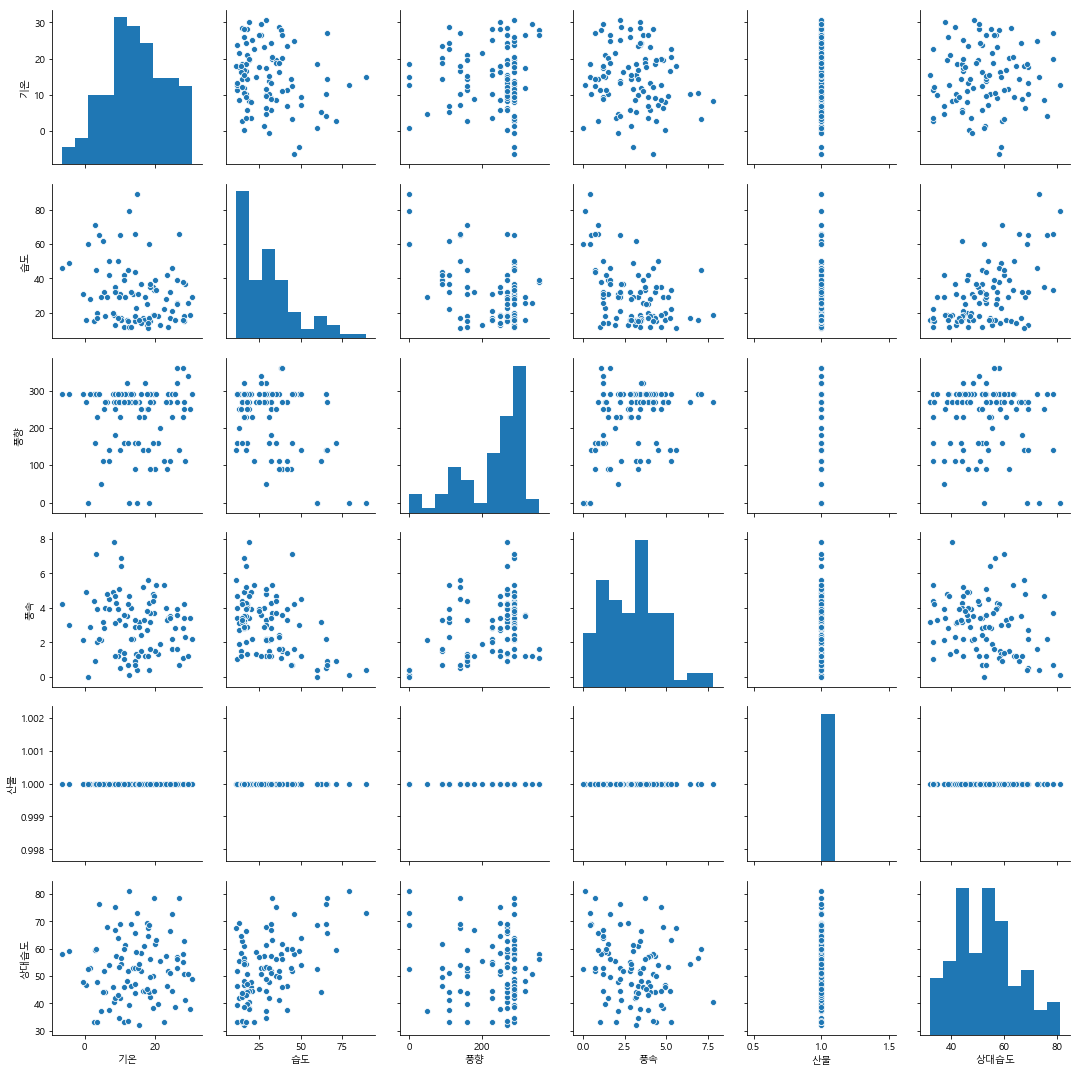

In [38]:
sns.pairplot(df)